Necessory Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Loading Datasets

In [62]:
df_math = pd.read_csv("student-mat.csv",sep=";")
df_por = pd.read_csv("student-por.csv",sep=";")

In [3]:
common_cols = ["school", "sex", "age", "address", "famsize", "Pstatus",
               "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

df_merged = pd.merge(df_math, df_por, on=common_cols, suffixes=('_math', '_por'))
print("Merged dataset shape:", df_merged.shape)


Merged dataset shape: (382, 53)


Encoding Binary Features

In [4]:
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df_math[col] = df_math[col].map({'yes': 1, 'no': 0})


Feature Selection for Predicting Maths Grade (G3)

In [5]:
features = ['Medu','Fedu','traveltime','studytime','failures','schoolsup','famsup','paid',
            'activities','nursery','higher','internet','romantic','famrel','freetime','goout',
            'Dalc','Walc','health','absences','G1','G2']
df_math[features]

,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,4,4,2,2,0,1,0,0,0,1,...,0,4,3,4,1,1,3,6,5,6
1,1,1,1,2,0,0,1,0,0,0,...,0,5,3,3,1,1,3,4,5,5
2,1,1,1,2,3,1,0,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,4,2,1,3,0,0,1,1,1,1,...,1,3,2,2,1,1,5,2,15,14
4,3,3,1,2,0,0,1,1,0,1,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,1,2,2,0,1,1,0,1,...,0,5,5,4,4,5,4,11,9,9
391,3,1,2,1,0,0,0,0,0,0,...,0,2,4,5,3,4,2,3,14,16
392,1,1,1,1,3,0,0,0,0,0,...,0,5,5,3,3,3,3,3,10,8
393,3,2,3,1,0,0,0,0,0,0,...,0,4,4,1,3,4,5,0,11,12


First We will be using Gradient Descent and Compare the results with Scikit Learn

Gradient Descent

In [6]:
X = df_math[features]
Y = df_math['G3']

To make the gradient descent work faster and efficient we standardize the features

In [7]:
X = (X - X.mean()) / X.std()


In [8]:
X.head()

,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1.142407,1.358648,0.791247,-0.042232,-0.449374,2.593843,-1.256063,-0.918506,-1.016592,0.507256,...,-0.707552,0.062115,-0.235711,0.800464,-0.540014,-1.002518,-0.398784,0.036378,-1.780209,-1.253202
1,-1.597982,-1.398197,-0.642435,-0.042232,-0.449374,-0.384552,0.794123,-0.918506,-1.016592,-1.966400,...,-0.707552,1.177367,-0.235711,-0.097784,-0.540014,-1.002518,-0.398784,-0.213525,-1.780209,-1.519053
2,-1.597982,-1.398197,-0.642435,-0.042232,3.584777,2.593843,-1.256063,1.085968,-1.016592,0.507256,...,-0.707552,0.062115,-0.235711,-0.996032,0.582646,0.550402,-0.398784,0.536185,-1.177653,-0.721500
3,1.142407,-0.479249,-0.642435,1.149321,-0.449374,-0.384552,0.794123,1.085968,0.981188,0.507256,...,1.409745,-1.053136,-1.236851,-0.996032,-0.540014,-1.002518,1.039751,-0.463428,1.232570,0.873607
4,0.228944,0.439699,-0.642435,-0.042232,-0.449374,-0.384552,0.794123,1.085968,-1.016592,0.507256,...,-0.707552,0.062115,-0.235711,-0.996032,-0.540014,-0.226058,1.039751,-0.213525,-1.478931,-0.189797


In [ ]:

X_np = np.c_[np.ones(X.shape[0]), X.values]  
Y_np = Y.values.reshape(-1, 1)              

In [22]:
epochs = 1000
alpha = 0.01
m, n = X_np.shape  

weight = np.zeros((n, 1))      
cost_history = []

for i in range(epochs):
    Y_p = X_np.dot(weight)                     
    error = Y_p - Y_np                         
    cost = (1 / m) * np.sum(error ** 2)  
    cost_history.append(cost)

    gradient = (2 / m) * X_np.T.dot(error)   
    weight = weight - alpha * gradient        



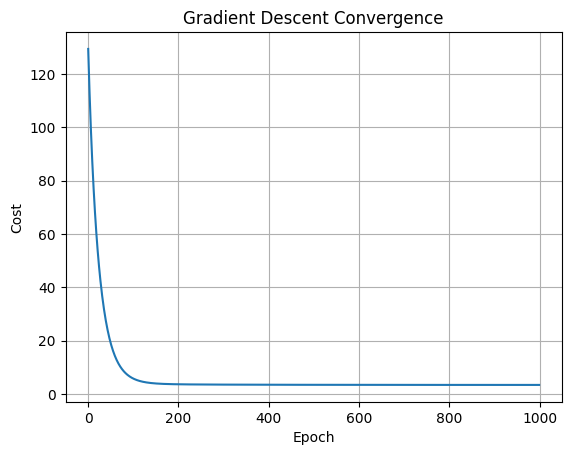

In [25]:
plt.plot(cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

Feature Importance in Final Math Grade(G3)

The larger the absolute value, the more important the feature is.

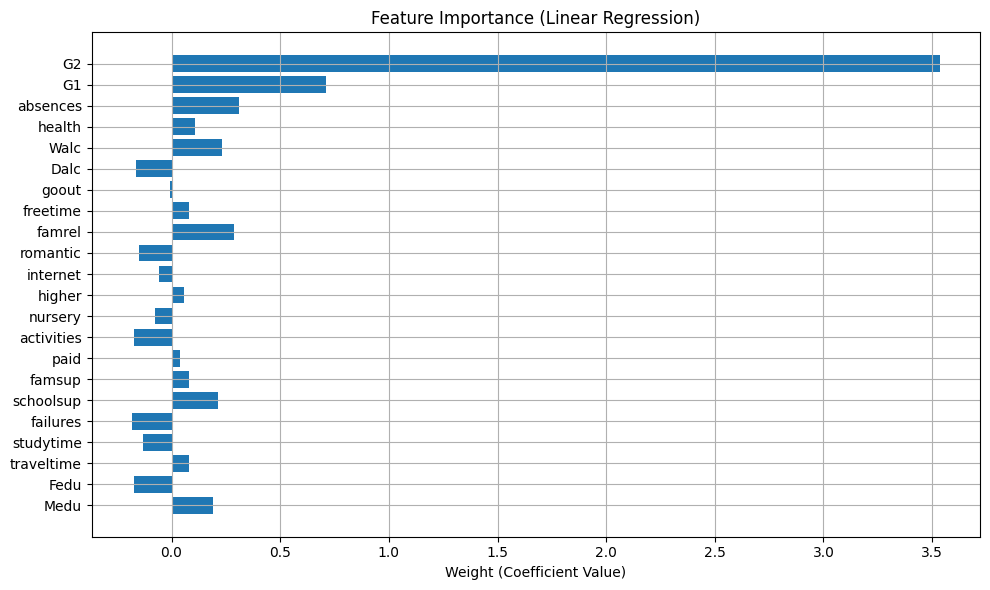

In [ ]:
feature_names = X.columns.tolist()


weights_no_bias = weight[1:].flatten()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, weights_no_bias)
plt.xlabel("Weight (Coefficient Value)")
plt.title("Feature Importance (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


SK Learn Implementation

In [53]:
model = LinearRegression()


model.fit(X, Y)
sklearn_weights = model.coef_    
sklearn_bias = model.intercept_   

Comparison

In [54]:

print("Feature\t\tYour Weights\tSklearn Weights")
print("--------------------------------------------------")

for i, col in enumerate(X.columns):
    print(f"{col:<16}\t{weight[i+1][0]:>10.4f}\t{sklearn_weights[i]:>10.4f}")

print(f"{'Intercept':<16}\t{weight[0][0]:>10.4f}\t{sklearn_bias:>10.4f}")


Feature		Your Weights	Sklearn Weights
--------------------------------------------------
Medu            	    0.1907	    0.1831
Fedu            	   -0.1723	   -0.1603
traveltime      	    0.0826	    0.0913
studytime       	   -0.1325	   -0.1272
failures        	   -0.1820	   -0.1832
schoolsup       	    0.2123	    0.1991
famsup          	    0.0781	    0.0763
paid            	    0.0381	    0.0311
activities      	   -0.1742	   -0.1752
nursery         	   -0.0765	   -0.0766
higher          	    0.0575	    0.0596
internet        	   -0.0558	   -0.0612
romantic        	   -0.1520	   -0.1436
famrel          	    0.2877	    0.2914
freetime        	    0.0801	    0.0840
goout           	   -0.0053	   -0.0014
Dalc            	   -0.1640	   -0.1633
Walc            	    0.2310	    0.2221
health          	    0.1075	    0.1088
absences        	    0.3124	    0.3149
G1              	    0.7091	    0.5974
G2              	    3.5345	    3.6441
Intercept       	   10.4152	   10.4152


In [55]:

Y_pred_custom = X_np.dot(weight)

Y_pred_sklearn = model.predict(X)

print("\n📈 Mean Squared Error:")
print("Your model     :", mean_squared_error(Y, Y_pred_custom))
print("Sklearn model  :", mean_squared_error(Y, Y_pred_sklearn))

print("\n🔎 R² Score:")
print("Your model     :", r2_score(Y, Y_pred_custom))
print("Sklearn model  :", r2_score(Y, Y_pred_sklearn))



📈 Mean Squared Error:
Your model     : 3.33427081851219
Sklearn model  : 3.3310431932208324

🔎 R² Score:
Your model     : 0.8407434718462713
Sklearn model  : 0.8408976346081047


Now we predict portuguese grade using sk learn 

In [ ]:
for col in binary_cols:
    df_por[col] = df_por[col].map({'yes':1, 'no':0})


,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,4,4,2,2,0,1,0,0,0,1,...,0,4,3,4,1,1,3,4,0,11
1,1,1,1,2,0,0,1,0,0,0,...,0,5,3,3,1,1,3,2,9,11
2,1,1,1,2,0,1,0,0,0,1,...,0,4,3,2,2,3,3,6,12,13
3,4,2,1,3,0,0,1,0,1,1,...,1,3,2,2,1,1,5,0,14,14
4,3,3,1,2,0,0,1,0,0,1,...,0,4,3,2,1,2,5,0,11,13


In [73]:
X = df_por[features]
Y = df_por['G3']

X = (X - X.mean()) / X.std()


model_por = LinearRegression()

model_por.fit(X,Y)

weight_por = model_por.coef_

bias_por = model.intercept_

In [77]:
Y_pred_por = model.predict(X)


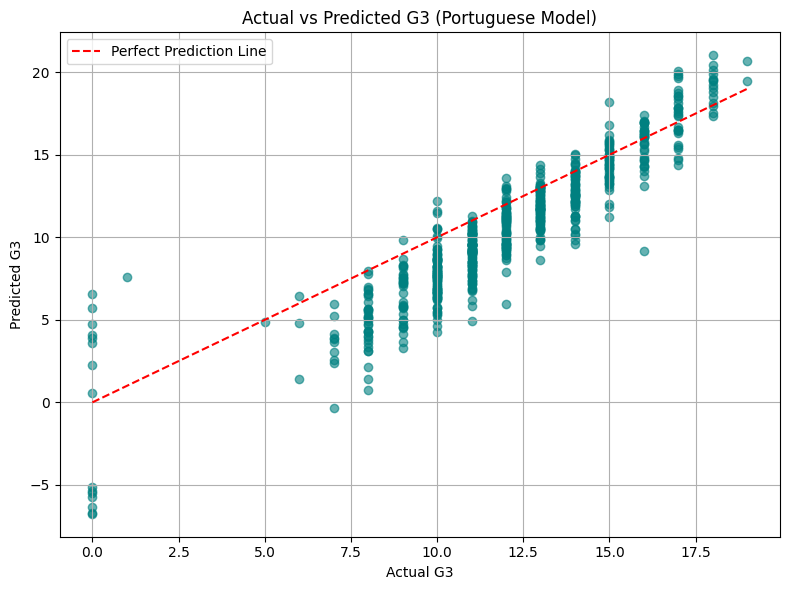

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(Y, Y_pred_por, alpha=0.6, color='teal')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted G3 (Portuguese Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
print("R2 score:    ",r2_score(Y,Y_pred_por))
print("Error:    ",mean_squared_error(Y,Y_pred_por))

R2 score:     0.4625646825703994
Error:     5.600644549544734


The R2 score of portuguese is moderate and it can be imporved if we use any other model like Random Forest or XG Boost.

Top Features in Predicting Portuguese Grade 

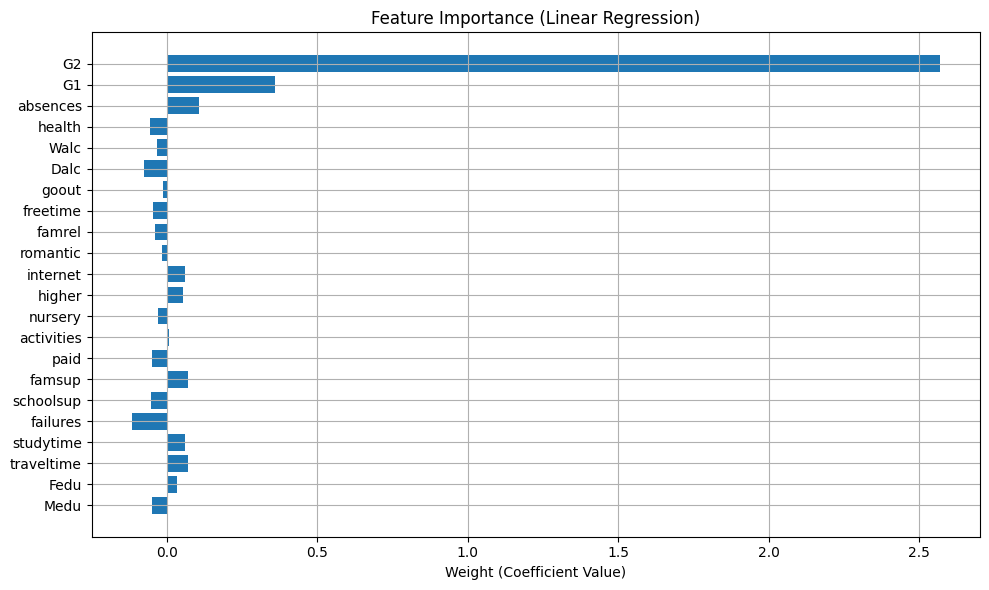

In [92]:
names = X.columns.to_list()

plt.figure(figsize=(10, 6))
plt.barh(names, weight_por)
plt.xlabel("Weight (Coefficient Value)")
plt.title("Feature Importance (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


